# Síntese por Alocação de Polos

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

### Definição

In [25]:
def place_poles(A, B, poles):
    """
    Place the poles of a system defined by its state matrix A and input matrix B.
    """
    rank_B = np.linalg.matrix_rank(B)
    unique_poles, counts = np.unique(poles, return_counts=True)
    
    for pole, count in zip(unique_poles, counts):
        if count > rank_B:
            # Adjust the repeated pole to ensure controllability
            poles[poles == pole] += 1e-6  # Adding a small perturbation
    
    sys = ctrl.StateSpace(A, B, np.eye(A.shape[0]), np.zeros((A.shape[0], B.shape[1])))
    K = ctrl.place(sys.A, sys.B, poles)
    return K

Agora, utilizando nas matrizes do problema

In [26]:
# Defina as matrizes A, B, C, D
A = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, -2.5*10**(-3), 0, 0, 0, 0],
              [0, 0, 0, 0, 9.9, 0, 0, 0, 0, -10],
              [0, 0, 0, -9.9, 0, 0, 0, 0, 10, 0],
              [0, 0, 0, 5.1*10**(-3), 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 5.1*10**(-3), 0, 0, 0, 0, 0]])

B = np.array([[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [9.72, 0],
              [0, -9.72],
              [0, -16.095],
              [-16.095, 0]])

C = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

D = np.zeros((2, 2))

cont = ctrl.StateSpace(A, B, C, D)

Algumas análises do modelo

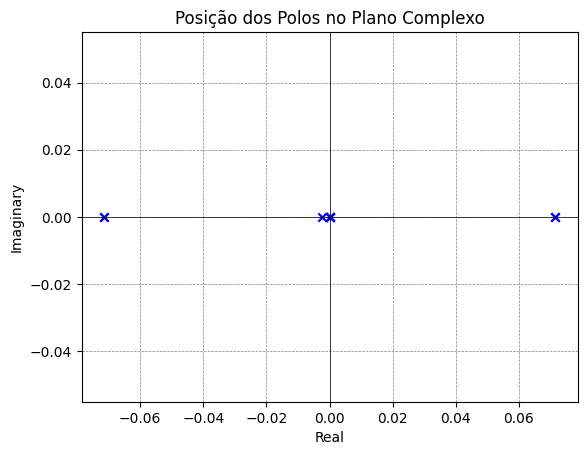

In [27]:
wn, zeta, poles = cont.damp()

# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()